In [1]:
#from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml 

# Load the Boston housing dataset
boston = fetch_openml(name="boston", as_frame=True)

# Access the data and target variables
data = boston.data
target = boston.target

C:\Users\kocha\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\kocha\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Detekcija autlajera

#### Detekciju autlajera pokazećemo na poznatom Boston Hounsing datasetu.

Boston housing dataset

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per 10,000 dollars

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in 1000 dollars

In [6]:
#boston = load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

df = pd.DataFrame(boston.data)
df.columns = columns
df.head()

CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [7]:
type(x)

pandas.core.frame.DataFrame

#### Autlajeri se vizualno mogu detektovati pomću boxplot

<Axes: xlabel='DIS'>

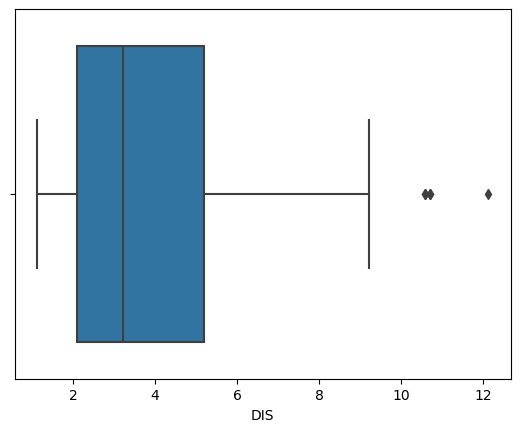

In [9]:
sns.boxplot(x=df['DIS'])

#### Vidimo da su vrednosti veće od 10 za atribut DIS autlajeri.
#### U nastavku ćemo izdvojiti te redove.

In [11]:
df.sort_values('DIS',ascending=False)

CRIM    ZN  INDUS CHAS    NOX     RM    AGE      DIS RAD    TAX  \
353   0.01709  90.0   2.02    0  0.410  6.728   36.1  12.1265   5  187.0   
351   0.07950  60.0   1.69    0  0.411  6.579   35.9  10.7103   4  411.0   
352   0.07244  60.0   1.69    0  0.411  5.884   18.5  10.7103   4  411.0   
354   0.04301  80.0   1.91    0  0.413  5.663   21.9  10.5857   4  334.0   
355   0.10659  80.0   1.91    0  0.413  5.936   19.5  10.5857   4  334.0   
..        ...   ...    ...  ...    ...    ...    ...      ...  ..    ...   
406  20.71620   0.0  18.10    0  0.659  4.138  100.0   1.1781  24  666.0   
373  11.10810   0.0  18.10    0  0.668  4.906  100.0   1.1742  24  666.0   
371   9.23230   0.0  18.10    0  0.631  6.216  100.0   1.1691  24  666.0   
374  18.49820   0.0  18.10    0  0.668  4.138  100.0   1.1370  24  666.0   
372   8.26725   0.0  18.10    1  0.668  5.875   89.6   1.1296  24  666.0   

     PTRATIO       B  LSTAT  
353     17.0  384.46   4.50  
351     18.3  370.78   5.49  
352     18.3  392.33   7.79  
354     22.0  382.80   8.05  
355     22.0  376.04   5.57  
..       ...     ...    ...  
406     20.2  370.22  23.34  
373     20.2  396.90  34.77  
371     20.2  366.15   9.53  
374     20.2  396.90  37.97  
372     20.2  347.88   8.88  

[506 rows x 13 columns]

In [12]:
df[df['DIS']>10]

CRIM    ZN  INDUS CHAS    NOX     RM   AGE      DIS RAD    TAX  \
351  0.07950  60.0   1.69    0  0.411  6.579  35.9  10.7103   4  411.0   
352  0.07244  60.0   1.69    0  0.411  5.884  18.5  10.7103   4  411.0   
353  0.01709  90.0   2.02    0  0.410  6.728  36.1  12.1265   5  187.0   
354  0.04301  80.0   1.91    0  0.413  5.663  21.9  10.5857   4  334.0   
355  0.10659  80.0   1.91    0  0.413  5.936  19.5  10.5857   4  334.0   

     PTRATIO       B  LSTAT  
351     18.3  370.78   5.49  
352     18.3  392.33   7.79  
353     17.0  384.46   4.50  
354     22.0  382.80   8.05  
355     22.0  376.04   5.57

#### Pokazaćemo sada kako se mogu nacrtati boxplots za sve atribute.
#### Nakon toga ćemo ukloniti neke atribute čiji nam raspon "kvari" grafik.

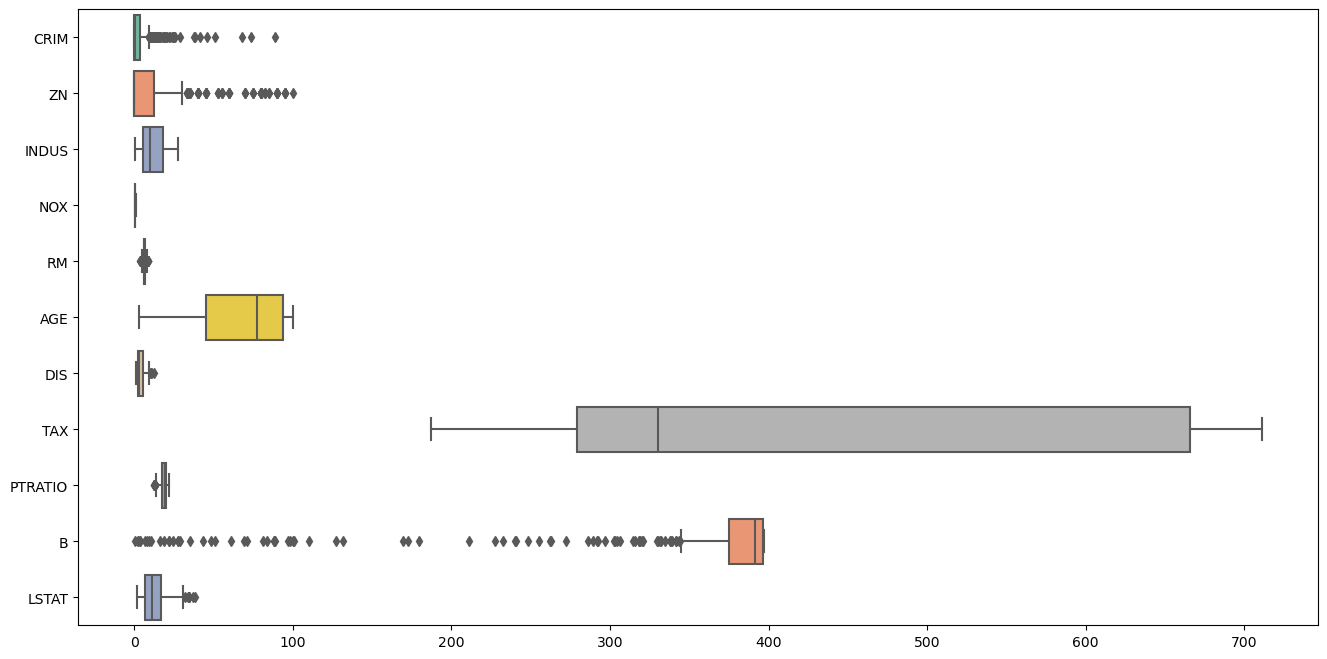

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")

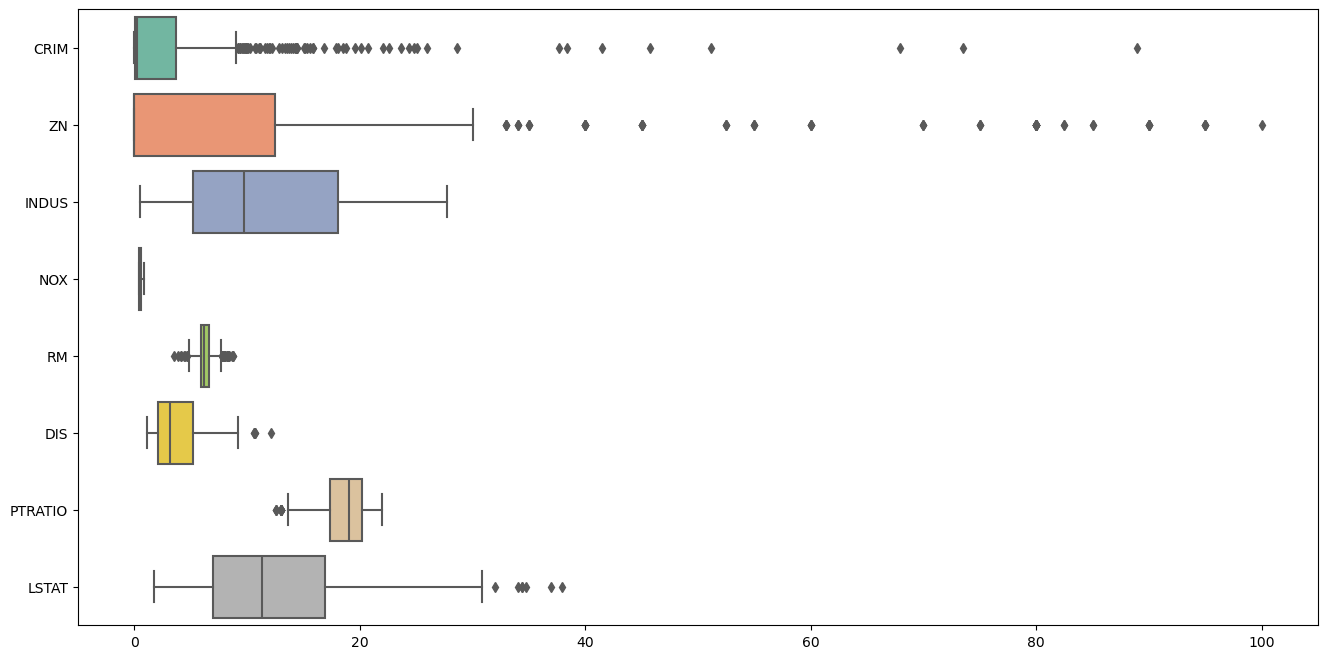

In [15]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df.drop(['TAX','B','AGE'],axis=1), orient="h", palette="Set2")

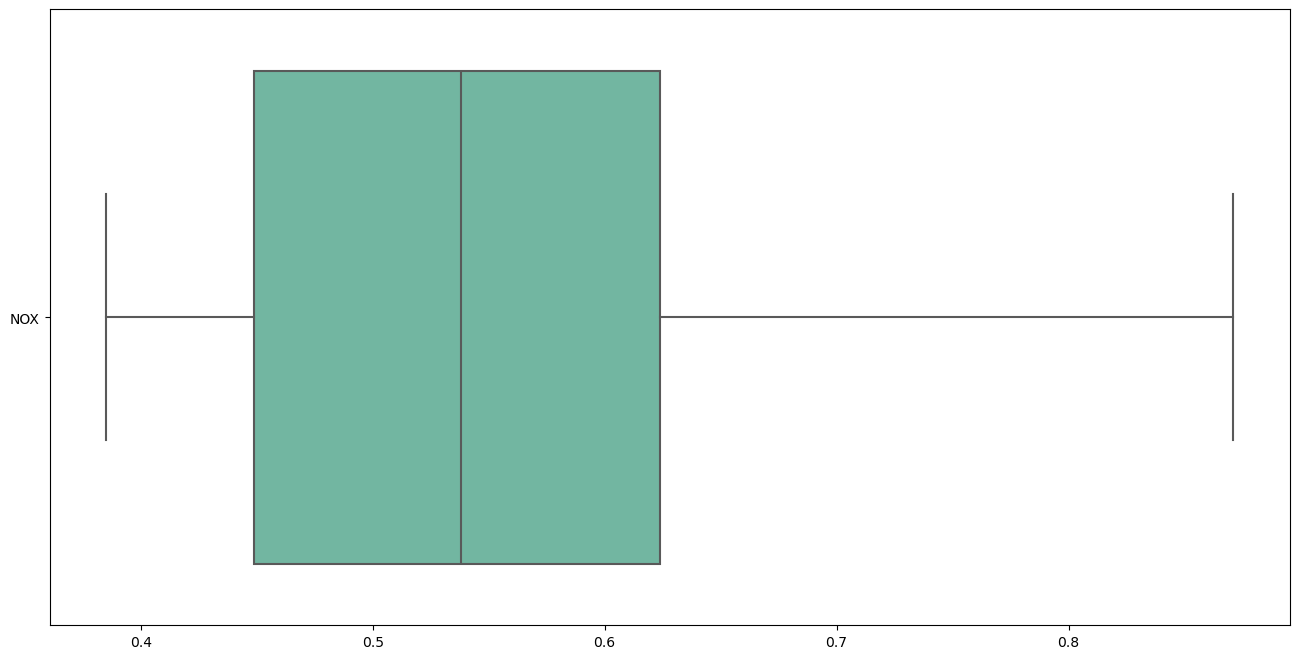

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df[['CHAS','NOX']], orient="h", palette="Set2")

#### Autlajeri se takođe mogu detektovati i pomoću scatter plots.
#### Na primer, na slici ispod vidimo da se većina tačaka grupiše u donjem levom uglu, dok se ostale mogu razmatrati kao autlajeri.

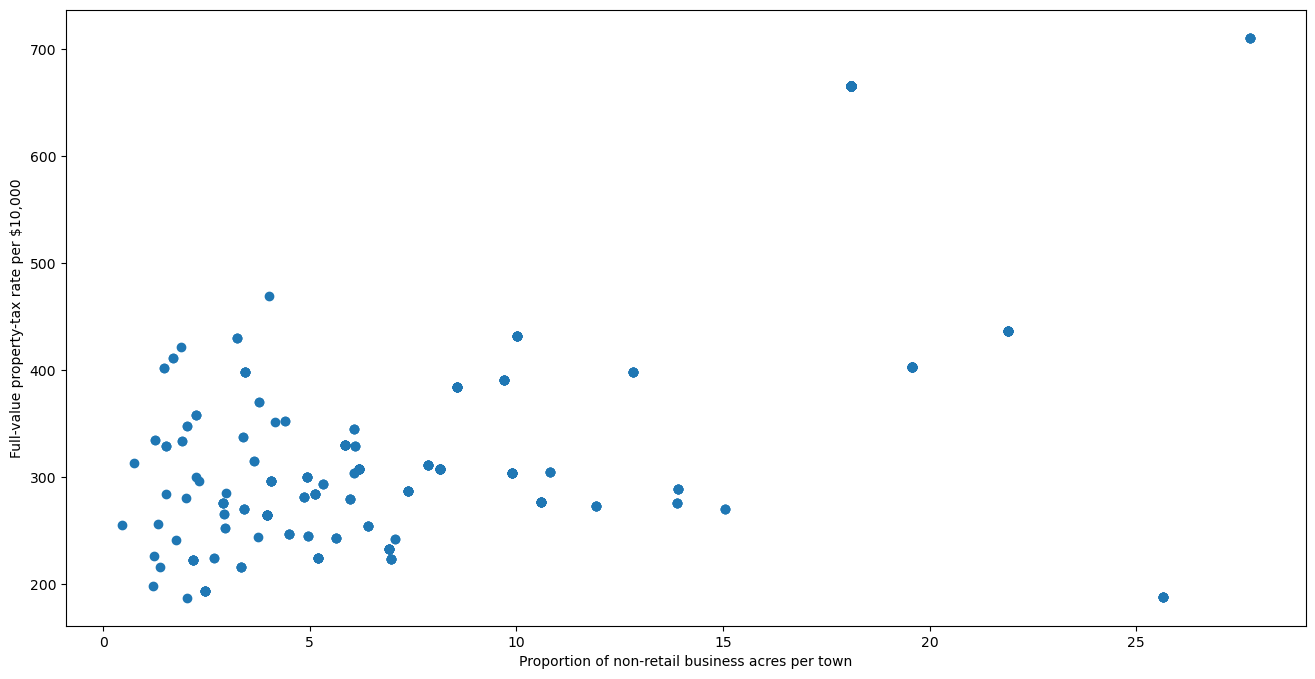

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['INDUS'], df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

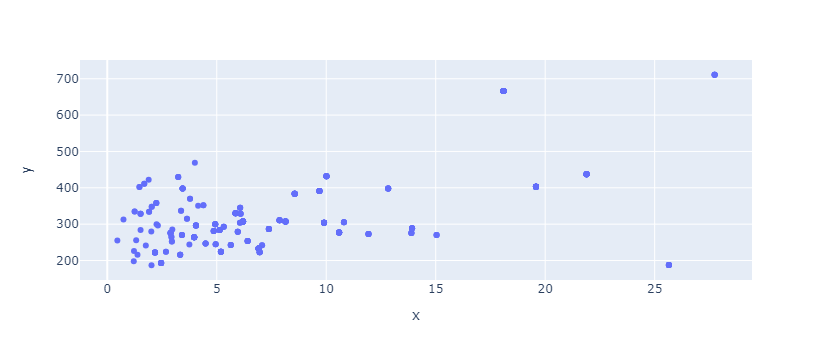

In [19]:
import plotly.express as px

fig_2d = px.scatter(x=df['INDUS'], y=df['TAX'])

fig_2d.show()

#### Ako broj atributa nije prevelik, možemo nacrtati i scatter plots po parovima atributa i onda razmotriti parove koji nam deluju kao da imaju autlajere.

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\kocha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

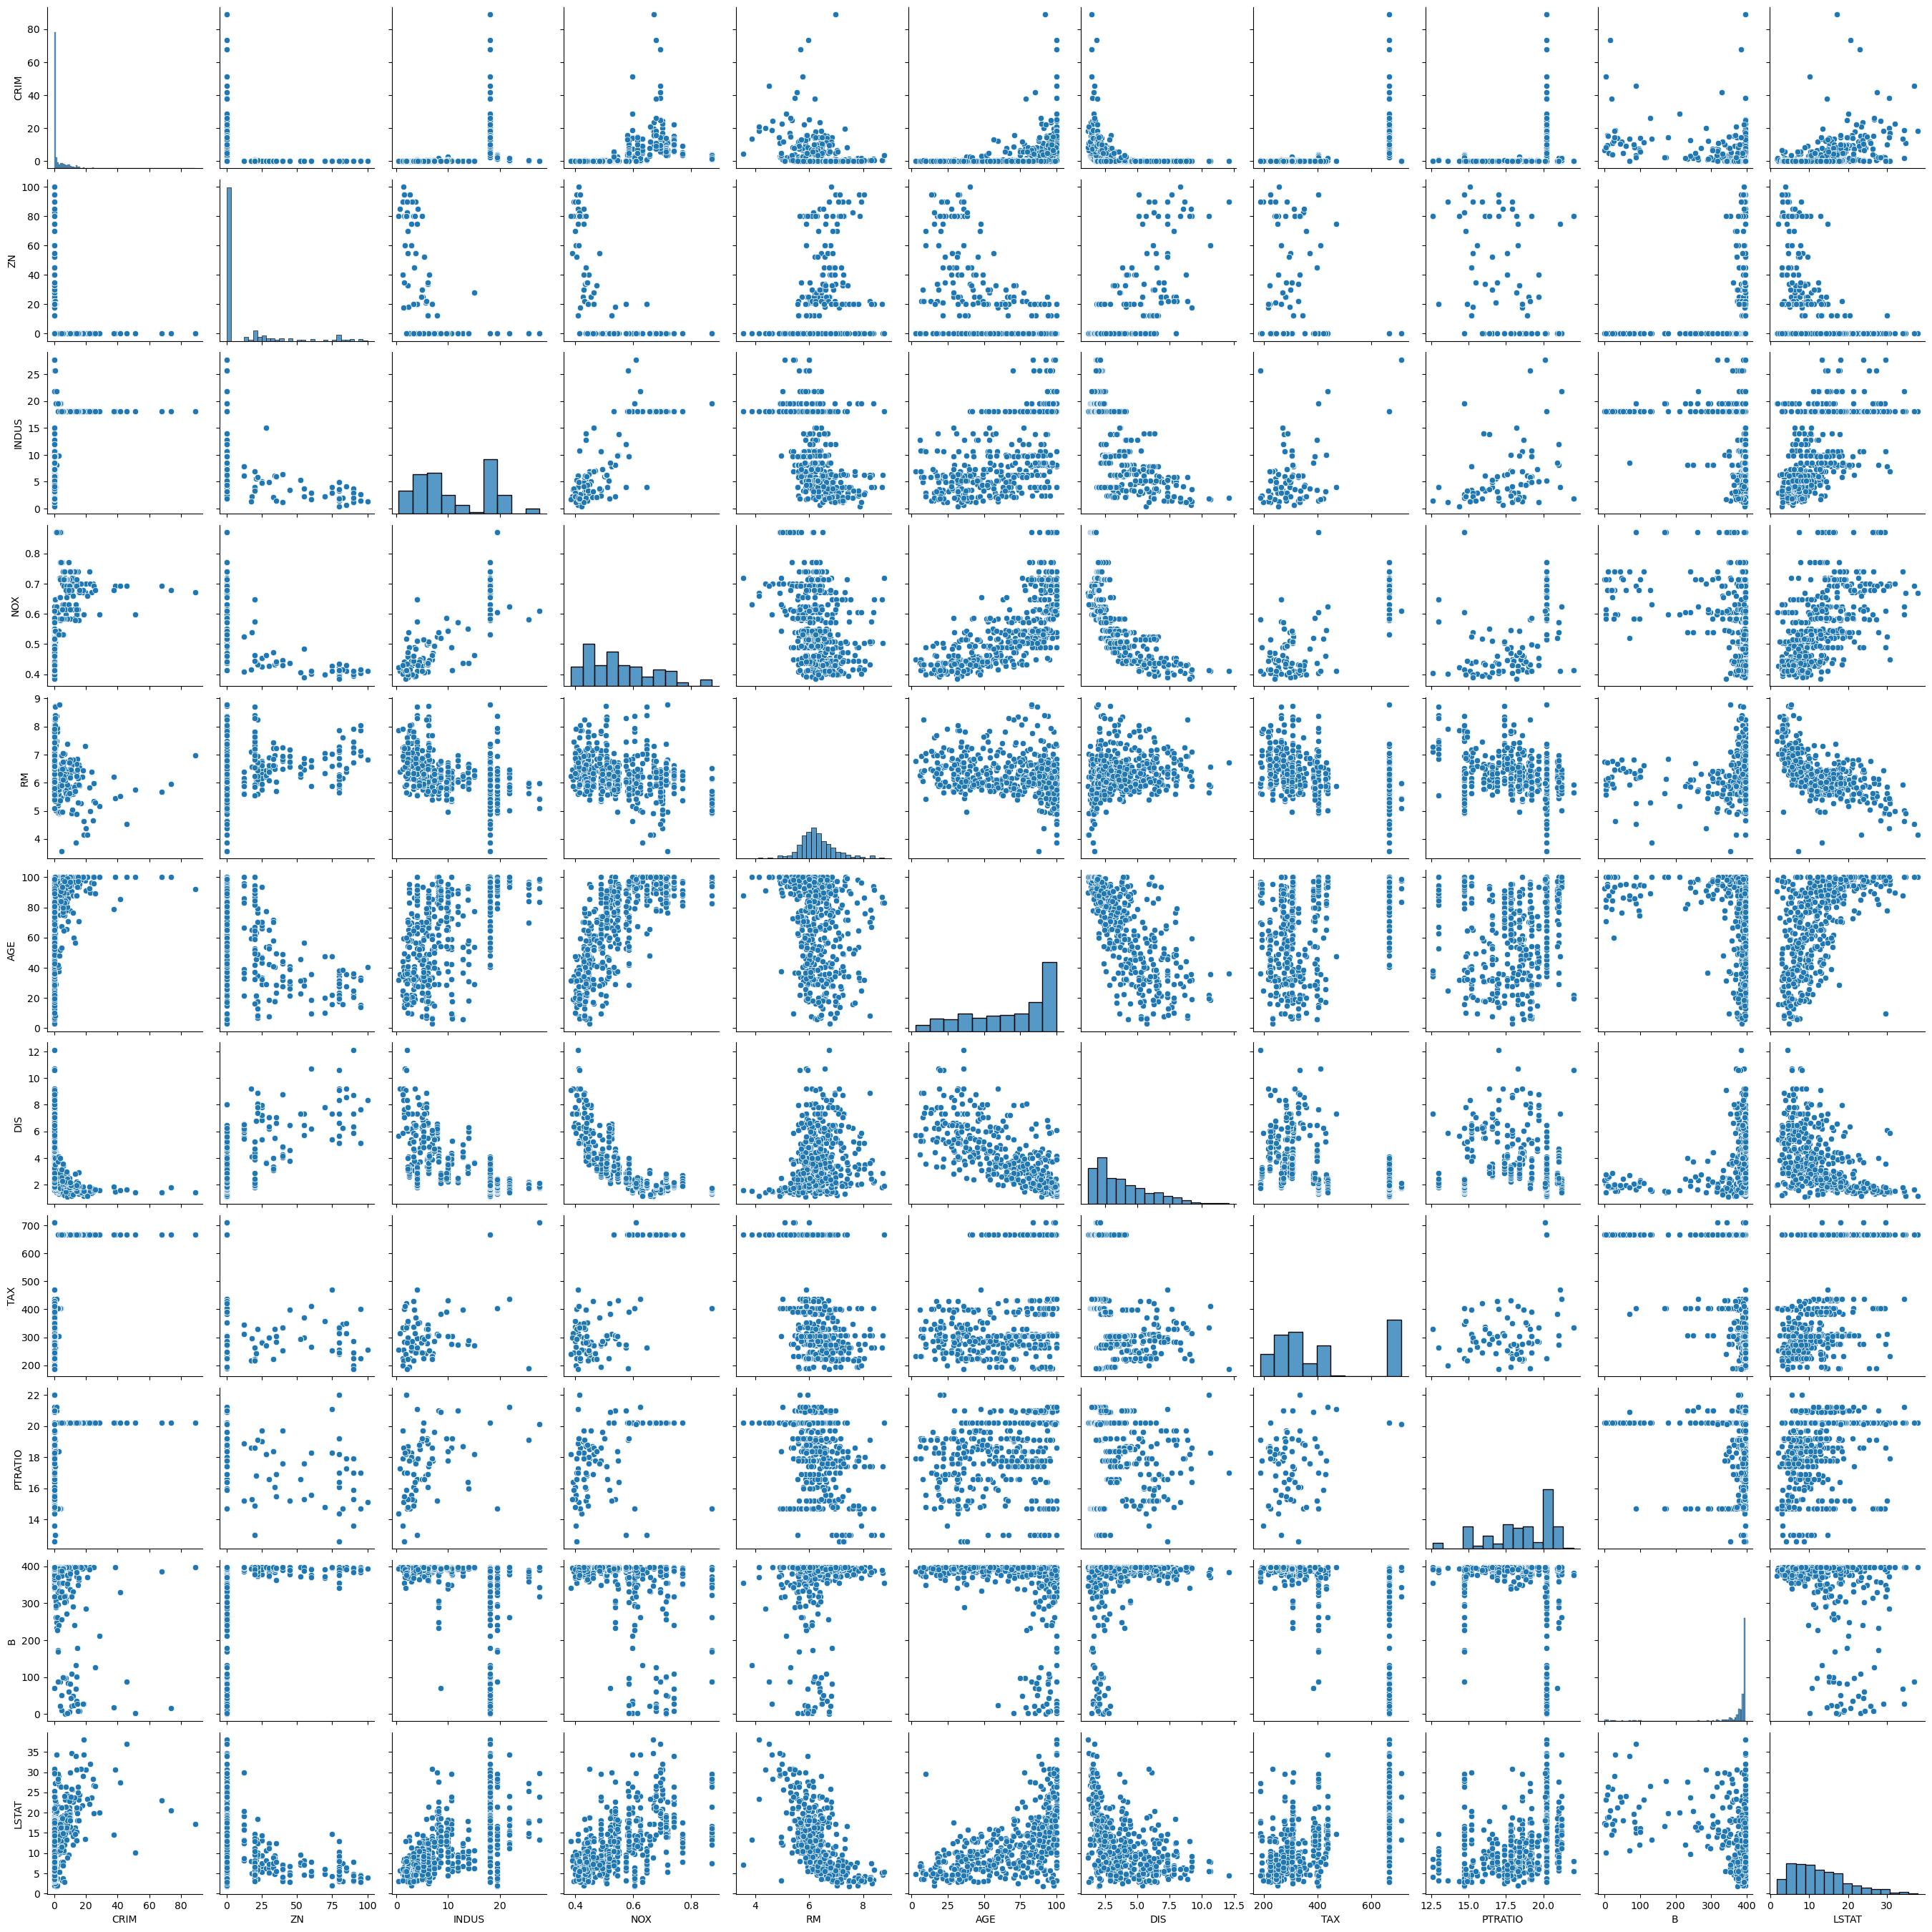

In [21]:
sns.pairplot(df)

#### Autlajeri se mogu pronaći i pomoću merenja koliko se standarnih devijacija razlikuju od srednje vrednosti (videti slajdove).
#### Ta mera se naziva z-score.
#### U nastavku izdvajamo redove koji bar za jedan atribut imaju z-score veći od 2.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [28]:
z = np.abs(stats.zscore(df))
print(z)
print(df.shape)
z.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
type(z)

In [ ]:
threshold = 3
np.asarray(z>threshold).nonzero()

In [ ]:
x = np.array([[3, 0, 0], [0, 4, 0], [5, 6, 8], [5, 0, 8]])
print(x)
np.nonzero(x)
#torka nizova indeksa elementa koji nisu nula, prvo su vrste, pa kolone.
#za ovaj primer rezultati su (0,0), (1,1), (2,0),....

In [ ]:
#Ako uzmemo samo indekse vrsta dobijamo indekse redova u df koji bar u nekoj koloni imaju z>2
tmp = df.iloc[np.asarray(z>3).nonzero()[0].tolist()]
tmp

#### Uz pretpostavku da srednja vrednost nije dobra mera za grupisanje podataka kada imamo autlajere, pokazaćemo na koji način možemo da koristimo medijan (pogledati slajdove).
#### Medijan koristimo na dva načina: (1) da korigujemo standardnu devijaciju i računamo z-score ili (2) da direktno pomoću njega računamo z-score. 

In [ ]:
stdevs = df.std()
print(stdevs)

In [ ]:
mads = df.mad()*1.4826
print(mads)

In [ ]:
def cap_outliers(series, zscore_threshold=2):
    median_val = series.median()
    mad_val = series.mad()# Median absolute deviation
    #mozemo da koristimo i median i mad ili korigovani st_dev i mean
    st_dev = mad_val*1.4826
    z_score = (series - series.mean()) / st_dev

    #z_score = (series - median_val) / mad
    outliers = abs(z_score) > zscore_threshold

    return series.loc[outliers]

In [ ]:
tmp = cap_outliers(df['CRIM'],3)

In [ ]:
tmp

In [ ]:
df[df.index.isin(tmp.index)]

In [ ]:
columns = list(df)
for c in columns: 
    print(df[df.index.isin(cap_outliers(df[c]).index)]) 

### Upotreba kvantila za detekciju autlajera

In [ ]:
def detect_outliers(df_in,cols):
    df = df_in.copy(deep=True)
    df['outlier'] = 0
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        Lower_Whisker = Q1-1.5*IQR
        Upper_Whisker = Q3+1.5*IQR
        df.loc[df[col]>Upper_Whisker,'outlier'] = 1
    return df

In [ ]:
df_outl = detect_outliers(df,['DIS'])

In [ ]:
df_outl.loc[df_outl['outlier'] == 1]

In [ ]:
#provera metoda pomocu box plots koji smo primenili na pocetku notebooka
df[df['DIS']>10]

### Metod Robust Mahalonibis Distance

In [ ]:
#Lepo objasnjenje Mahalanobis distance https://www.machinelearningplus.com/statistics/mahalanobis-distance/ - mera rastojanja tacke od distribucije za slucaj vise promenjljivih
#Objasnjenje za Robust MD https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33
#Sustina kod Robust metode je u tome da su srednja vrednost i matrica kovarijansi osteljive na autlajere pa se izracunavaju na drugaciji nacin

In [ ]:
import copy 
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = [] #pretpostavlja se da MD prati Hi-kvadrat distribuciju. Autlajeri su tacke koje imaju vrednost koja je malo verovatna 
    #videti tacku 6. ovde https://www.machinelearningplus.com/statistics/mahalanobis-distance/
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md

In [ ]:
outliers_mahal_rob, md_rb = robust_mahalanobis_method(df)

In [ ]:
df.index[outliers_mahal_rob]

In [ ]:
df.iloc[df.index[outliers_mahal_rob]]

In [ ]:
# Dobijeni autlajeri detektovani su tako da su svi atributi uzeti u razmatranje.
# Dakle, moguce je da su neke tacke autlajeri po jednom atributu, npr. 'DIS' ali ne i kada se svi atributi zajedno uzmu u obzir